In [1]:
%load_ext autoreload
%autoreload 2

In [84]:
from brute_stratum import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from decimal import Decimal


In [47]:
# increase dpi of figures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
def get_label(s_tuple):
    stratum = ''
    for c in s_tuple:
        stratum += f'{c[0]}'
        if c[1] != 1:
            stratum += f'^{c[1]} '
        else:
            stratum += ' '

    return f'({stratum[:-1]})'

In [94]:
num_samps = 5000
n = 99
unfixed, fixed, results = compare_fixed_unfixed(99, genus=False, num_samples=num_samps)

In [96]:
num_samps = 50000
# n = 100

for n in range(50,500):
    unfixed, fixed, results = compare_fixed_unfixed(n, genus=False, num_samples=num_samps)

    u = list(unfixed.items())
    # u = list(fixed.items())

    u.sort(key = lambda x:x[1],reverse=True)

    # for s,c in u[:1]:
    s,c = u[0]
    print(f'Empirical: {Decimal(float(c/num_samps)):.2E}, Theoretical: \
        {Decimal(float(2/(n-1) if n %2==0 else 2/n)):.2E}')



Empirical: 3.79E-2, Theoretical:         4.08E-2
Empirical: 3.90E-2, Theoretical:         3.92E-2
Empirical: 3.93E-2, Theoretical:         3.92E-2
Empirical: 3.63E-2, Theoretical:         3.77E-2
Empirical: 3.73E-2, Theoretical:         3.77E-2
Empirical: 3.56E-2, Theoretical:         3.64E-2
Empirical: 3.63E-2, Theoretical:         3.64E-2
Empirical: 3.45E-2, Theoretical:         3.51E-2
Empirical: 3.46E-2, Theoretical:         3.51E-2
Empirical: 3.34E-2, Theoretical:         3.39E-2
Empirical: 3.25E-2, Theoretical:         3.39E-2
Empirical: 3.19E-2, Theoretical:         3.28E-2
Empirical: 3.28E-2, Theoretical:         3.28E-2
Empirical: 3.01E-2, Theoretical:         3.17E-2
Empirical: 3.09E-2, Theoretical:         3.17E-2
Empirical: 2.95E-2, Theoretical:         3.08E-2
Empirical: 3.09E-2, Theoretical:         3.08E-2
Empirical: 2.97E-2, Theoretical:         2.99E-2
Empirical: 3.01E-2, Theoretical:         2.99E-2
Empirical: 2.92E-2, Theoretical:         2.90E-2
Empirical: 2.89E-2, 

In [95]:
f = list(fixed.items())
f.sort(key = lambda x:x[1], reverse=True)
f[:3]

[(((98, 1),), 95), (((0, 2), (96, 1)), 55), (((0, 1), (1, 1), (95, 1)), 54)]

In [11]:
def expected_val(vals, num_samples):
    expected = 0
    for val, sample in vals:
        expected += val*sample/num_samples
    
    return round(expected, 2)



In [42]:
num_samples= 50000
results = {}
props = []
for i in tqdm(range(1,251)):
    unfixed, fixed, _ = compare_fixed_unfixed(i, genus=True, num_samples=num_samples)
    values_unfixed = sorted(list(unfixed.items()), key = lambda x:x[1], reverse=True)
    values_fixed = sorted(list(fixed.items()), key = lambda x:x[1], reverse=True)

    props.append((values_unfixed[0][1], values_fixed[0][1]))

    results[i] = (expected_val(values_unfixed, num_samples),expected_val(values_fixed, num_samples))


100%|██████████| 250/250 [32:01<00:00,  7.69s/it]


In [43]:
r = list(results.items()) # col 1: genus, col 2: unfixed, col 3: fixed

In [44]:
n, g = zip(*r)
g_unfixed, g_fixed = zip(*g)

In [45]:
x = [i for i in range(1,251)]
y = [i/2 for i in range(1, 251)]

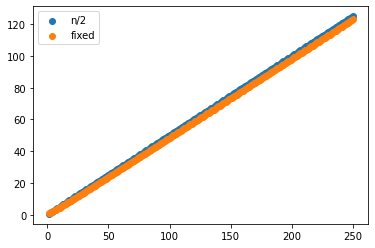

In [46]:
# plt.scatter(n, g_unfixed, label = "unfixed")
plt.scatter(x, y, label = "n/2")
plt.scatter(n, g_fixed, label = "fixed")
plt.legend()
plt.show()

In [53]:
fixed = [a / 50000  for a in fixed_prop]

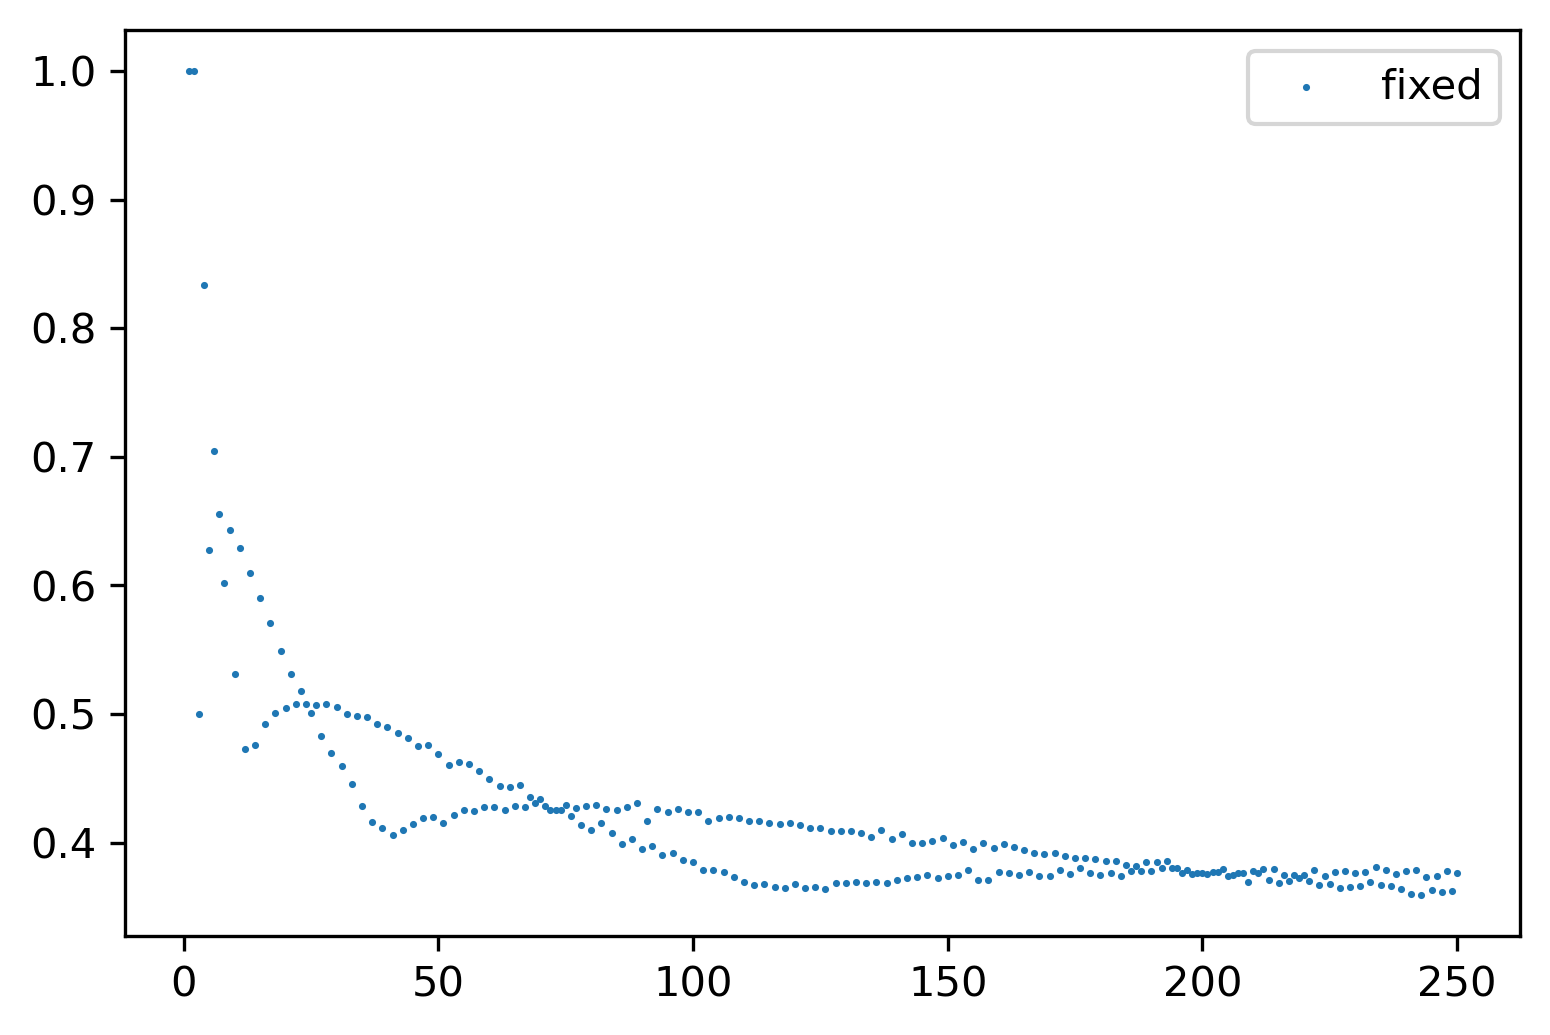

In [54]:
unfixed_prop, fixed_prop = zip(*props)

# plt.scatter(x, unfixed_prop, label = "unfixed", s=2)
plt.scatter(n, fixed, label = "fixed", s=0.5)
plt.legend()
plt.show()